<a href="https://colab.research.google.com/github/CristianoCoelhoSilva/Python/blob/master/PNAD_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pesquisa Nacional por Amostra de Domicílios - PNAD COVID19

Objetiva estimar o número de pessoas com sintomas referidos associados à síndrome gripal e monitorar os impactos da pandemia da COVID-19 no mercado de trabalho brasileiro.

A coleta da Pesquisa Nacional por Amostra de Domicílios - PNAD COVID19 teve início em 4 de maio de 2020, com entrevistas realizadas por telefone em, aproximadamente, 48 mil domicílios por semana, totalizando cerca de 193 mil domicílios por mês, em todo o Território Nacional. A amostra é fixa, ou seja, os domicílios entrevistados no primeiro mês de coleta de dados permanecerão na amostra nos meses subsequentes, até o fim da pesquisa.

O questionário se divide em duas partes, sendo uma direcionada a questões de saúde, especificamente sobre sintomas associados à síndrome gripal e outra, a questões de trabalho. Nas questões de saúde, investiga-se a ocorrência de alguns dos principais sintomas da COVID19 no período de referência da pesquisa, considerando-se todos os moradores do domicílio. Para aqueles que apresentaram algum sintoma, perguntam-se quais as providências tomadas para alivio dos sintomas; se buscaram por atendimento médico devido a esses sintomas; e o tipo de estabelecimento de saúde procurado. Nas questões de trabalho, busca-se classificar a população em idade de trabalhar nas seguintes categorias: ocupados, desocupados e pessoas fora da força de trabalho. Investiga-se, ainda, os seguintes aspectos: ocupação e atividade; afastamento do trabalho e o motivo do afastamento; exercício de trabalho remoto; busca por trabalho; motivo por não ter procurado trabalho; horas semanais efetivamente e habitualmente trabalhadas; assim como o rendimento efetivo e habitual do trabalho. Por fim, visando compor o rendimento domiciliar, pergunta-se se algum morador recebeu outros rendimentos não oriundos do trabalho, tais como: aposentadoria, BPC-LOAS, Bolsa Família, algum auxílio emergencial relacionado à COVID, seguro desemprego, aluguel e outros. Cabe ressaltar que a PNAD COVID19 é uma pesquisa com instrumento dinâmico de coleta das informações; portanto, o questionário está sujeito a alterações ao longo do período de sua aplicação.

A pesquisa prevê divulgações semanais para alguns indicadores, em nível Brasil, e divulgações mensais para um conjunto mais amplo de indicadores, por Unidades da Federação.

Os resultados da PNAD COVID19 são pioneiros no sentido de constituírem a primeira divulgação de Estatísticas Experimentais elaboradas pelo IBGE, as quais estão alinhadas com a estratégia de modernização do Instituto e permitem a ampliação das ofertas de informação para atender às necessidades de seus usuários.

https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=Trabalho_e_Rendimento/Pesquisa_Nacional_por_Amostra_de_Domicilios_PNAD_COVID19/Microdados/Dados

# Características dos dados

Parte 1 - Identificação e Controle
Parte A - Características gerais dos moradores
Parte B - COVID19 - Todos os moradores
Parte C - Características de trabalho das pessoas de 14 anos ou mais de idade
Parte D - Rendimento de outras fontes dos moradores de 14 anos ou mais de idade
Parte E - Empréstimos
Parte Suplementar 01 - Características da habitação


# Prospecção de Internação e sedação, entubação ou colocado em respiração artificial com ventilador de COVID-19 em relação aos sintomas sentidos e diagnóstico de comorbidade


A COVID-19 afeta diferentes pessoas de diferentes maneiras. A maioria das pessoas infectadas apresentará sintomas leves a moderados da doença e não precisarão ser hospitalizadas. De acordo com a base de dados coletada e tratada, a nossa intenção é predizer qual é a chance de uma pessoa que sentiu algum dos sintomas (febre, tosse, dor de garganta, difilcudade de respirar dor de cabeça, dor no peito, nausea, nariz entupido ou escorrendo, fadiga, dor nos olhos, perdade de paladar ou olfato, dor muscular ou diarreia) e que tem ou não algum diagnostico de algum comorbidade como diabetes, obesidade, hipertensão, tuberculose, entre outros, aumentam a possíbilidade de internação ou entubação.

# Tratamento dos dados

# Passo 1

Vamos remover as colunas que julgamos não acrescentarem nenhum valor ao nosso modelo.


    NUMERO            - Número de Ordem
    SEMANA            - Semana no mês
    NUMERO_ENTREVISTA - Número da Entrevista
    NUMERO_ORDEM      - Número de Ordem
    UF                - Unidade Federativa
    SITUACAO          - Situação do domicílio (Urbana; Rural)
    DOMICILIO         - 
    RESPONDEU         - Quem respondeu ao questionário
    ESCOLARIDADE      - Nível escolar
 
# Passo 2

Para predizer se uma pessoa tem a possibilidade de ser internada vamos revomer a váriavel B006 - Durante a internação, foi sedado, entubado e colocado em respiração artificial com ventilador?

In [13]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#Arquivo completo
#df = pd.read_csv(r"https://raw.githubusercontent.com/CristianoCoelhoSilva/Python/master/Python/covid.csv")
#Arquivo com apenas 2 mil Observações
df = pd.read_csv(r"https://raw.githubusercontent.com/CristianoCoelhoSilva/Python/master/Python/covid_limit.csv")

df.describe()
#df
#df.columns
#df.head
#type(df)

#Removendo as colunas
df.drop(["NUMERO","SEMANA","NUMERO_ENTREVISTA","NUMERO_ORDEM","UF","SITUACAO","DOMICILIO","RESPONDEU","ESCOLARIDADE"], axis="columns", inplace=True)
df.drop(["B006"], axis="columns", inplace=True)


X = df.drop(['B005'], axis = "columns")
y = df.B005

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

# Cria nosso pipeline para pré-processamento com imputação, dummização e normalização
encoder_imputer_scaled_transformer = make_column_transformer(
    (make_pipeline(
        (KNNImputer(n_neighbors = 3)),
        (StandardScaler())
    ) , make_column_selector(dtype_include = np.number)),
    (make_pipeline(
        SimpleImputer(strategy = 'most_frequent'),
        OneHotEncoder(handle_unknown = 'ignore'),
    ), make_column_selector(dtype_exclude = np.number)),
    remainder = 'passthrough'
)

encoder_imputer_scaled_transformer.fit(X_train)

X_train_processed = encoder_imputer_scaled_transformer.transform(X_train)
X_test_processed = encoder_imputer_scaled_transformer.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 3)
  
knn.fit(X_train_processed, y_train)
# Avalia a performance do algoritmo utilizando a métrica de accuracy
y_pred = knn.predict(X_test_processed)
accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)

print(accuracy)

'''
for algoritimo in range(4):
  # Algoritimos
  if algoritimo == 0:
    print('Knn')
    clf = KNeighborsClassifier(n_neighbors = 3)
  elif algoritimo ==1:
    print('Decision Tree')
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
  elif algoritimo ==2:
    print('NB')
    clf = GaussianNB()
    clf.fit(X_train_processed, y_train)
  elif algoritimo ==3:
    print('Random Forest')
    clf = RandomForestClassifier()
  clf.fit(X_train_processed, y_train)
  # Avalia a performance do algoritmo utilizando a métrica de accuracy
  y_pred = clf.predict(X_test_processed)
  accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
'''

  


0.8561643835616438


'\nfor algoritimo in range(4):\n  # Algoritimos\n  if algoritimo == 0:\n    print(\'Knn\')\n    clf = KNeighborsClassifier(n_neighbors = 3)\n  elif algoritimo ==1:\n    print(\'Decision Tree\')\n    clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)\n  elif algoritimo ==2:\n    print(\'NB\')\n    clf = GaussianNB()\n    clf.fit(X_train_processed, y_train)\n  elif algoritimo ==3:\n    print(\'Random Forest\')\n    clf = RandomForestClassifier()\n  clf.fit(X_train_processed, y_train)\n  # Avalia a performance do algoritmo utilizando a métrica de accuracy\n  y_pred = clf.predict(X_test_processed)\n  accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)\n'

In [92]:
#confusion_matrix(y_test, y_pred)

#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())


## Aplicando o $k$-fold cross-validation para avaliação do modelo

In [11]:
X_processed = encoder_imputer_scaled_transformer.fit_transform(X)

In [14]:
scores = cross_val_score(estimator = knn, 
                         X = X_processed, # usamos a base completa agora
                         y = y, 
                         cv=10, 
                         scoring='accuracy')

print("Acurácia em cada fold: {}".format(scores))
print("Acurácia média nos folds: {}".format(np.mean(scores)))

Acurácia em cada fold: [0.87692308 0.87692308 0.87692308 0.85128205 0.86153846 0.82474227
 0.87113402 0.81958763 0.78865979 0.86597938]
Acurácia média nos folds: 0.8513692836373249


## Qual é o efeito da quantidade de folds nas estimativas?

In [15]:
import seaborn
import matplotlib.pyplot as plt

clf = KNeighborsClassifier(n_neighbors = 3)
  
clf.fit(X_train_processed, y_train)
# Avalia a performance do algoritmo utilizando a métrica de accuracy
y_pred = clf.predict(X_test_processed)
accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)

print(accuracy)

0.8561643835616438


In [20]:
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

results_cross_validation = []
for k in range(3, 51):
  for time in range(30):
    kf = KFold(n_splits=k, shuffle=True).split(X_processed)
    scores = cross_val_score(knn, X_processed, y, cv=kf, scoring='accuracy')
    results_cross_validation = results_cross_validation + [[k, time, np.mean(scores)]]

KeyboardInterrupt: ignored

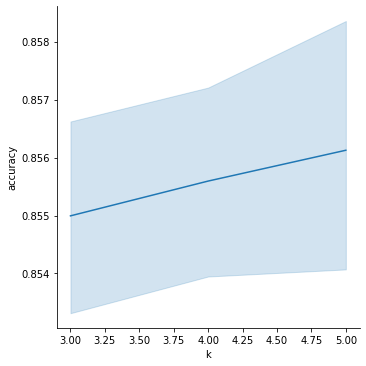

In [21]:
df = pd.DataFrame(results_cross_validation,columns=['k','time_id', 'accuracy'])

seaborn.relplot(data = df,
                x = 'k',
                y = 'accuracy',
                kind = 'line')
plt.show()

## Utilizando o $k$-fold cross-validation para seleção do modelo

In [22]:
results = pd.DataFrame(columns=['n_neighbors', 'accuracy'])

for n_neighbors in range(1, 31):
  knn = KNeighborsClassifier(n_neighbors = n_neighbors)
  scores = cross_val_score(knn, X_train_processed, y_train, cv=9, scoring='accuracy')
  results = results.append({'n_neighbors' : n_neighbors,
                  'accuracy' : np.mean(scores)}, ignore_index = True)

results

,n_neighbors,accuracy
0,1.0,0.849391
1,2.0,0.833227
2,3.0,0.865541
3,4.0,0.861135
4,5.0,0.862617
5,6.0,0.858942
6,7.0,0.871418
7,8.0,0.870672
8,9.0,0.874361
9,10.0,0.869230


O k que maximiza a acurácia no conjunto de treinamento é: 21


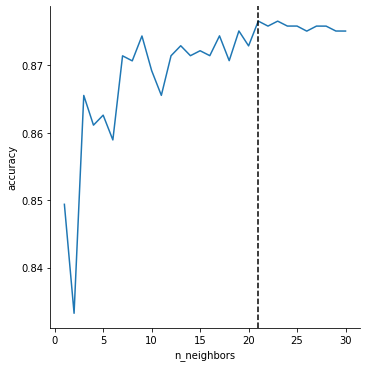

In [23]:
import seaborn
import matplotlib.pyplot as plt

melhor_k = int(results[results.accuracy == results.accuracy.max()]['n_neighbors'].values[0])

seaborn.relplot(data = results,
                x = 'n_neighbors',
                y = 'accuracy',
                kind = 'line')
plt.axvline(x=melhor_k, color="black", linestyle= "--")

print("O k que maximiza a acurácia no conjunto de treinamento é: {}".format(melhor_k))

In [24]:
knn_melhor_k = KNeighborsClassifier(n_neighbors=melhor_k)
knn_melhor_k.fit(X_train_processed, y_train)

y_pred = knn_melhor_k.predict(X_test_processed)

accuracy = accuracy_score(y_true = y_test, 
                          y_pred = y_pred)

accuracy

0.8784246575342466

In [25]:
from sklearn.model_selection import GridSearchCV

grid_valores = {"n_neighbors": range(1, 31)}

knn_automatico = GridSearchCV(estimator = KNeighborsClassifier(), 
                              param_grid = grid_valores, 
                              cv = 10,
                              scoring = 'accuracy',
                              refit = True)

knn_automatico.fit(X_train_processed, y_train)

print("Melhor parâmetro do modelo knn: ")
print(knn_automatico.best_params_)

print("Desempenho médio no fold de validação: ")
print(np.mean(knn_automatico.cv_results_['mean_test_score']))

y_pred = knn_automatico.predict(X_test_processed)

accuracy = accuracy_score(y_true = y_test, 
                          y_pred = y_pred)

print("Desempenho médio no fold de teste: ")
accuracy


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Melhor parâmetro do modelo knn: 
{'n_neighbors': 28}
Desempenho médio no fold de validação: 
0.8687467797337912
Desempenho médio no fold de teste: 


0.8767123287671232

In [26]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("preprocessamento", encoder_imputer_scaled_transformer),
    ("knn", KNeighborsClassifier())
])

grid_valores = {"knn__n_neighbors": range(1, 31)}

classificador = GridSearchCV(estimator = pipeline, 
                              param_grid = grid_valores,
                              cv = 9, 
                              scoring = "accuracy", 
                              refit = True)

In [37]:
classificador.fit(X_train, y_train)

GridSearchCV(cv=9, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessamento',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('knnimputer',
                                                                                          KNNImputer(add_indicator=False,
                                                                                                     copy=True,
                     

In [28]:
print("Melhor parâmetro do modelo knn: ")
print(classificador.best_params_)

print("Desempenho médio no fold de teste: ")
print(np.mean(classificador.cv_results_['mean_test_score']))

Melhor parâmetro do modelo knn: 
{'knn__n_neighbors': 22}
Desempenho médio no fold de teste: 
0.8689046706169398


Pushing to the limits

In [39]:
from sklearn.compose import ColumnTransformer

pipeline_estendido = Pipeline([
    ("pre_process", make_column_transformer(
                              (Pipeline([
                                  ('imputer', KNNImputer(n_neighbors = 3)),
                                  ('scaler', StandardScaler())
                              ]) , make_column_selector(dtype_include = np.number)),
                              (Pipeline([
                                  ("imputer", SimpleImputer(strategy = 'most_frequent', fill_value = "unknown")),
                                  ("encoder", OneHotEncoder(handle_unknown = 'ignore'))
                              ]), make_column_selector(dtype_exclude = np.number))
                          )),
    ("knn", KNeighborsClassifier())                           
])

pipeline_estendido

Pipeline(memory=None,
         steps=[('pre_process',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   KNNImputer(add_indicator=False,
                                                                              copy=True,
                                                                              metric='nan_euclidean',
                                                                              missing_values=nan,
                                                                              n_neighbors=3,
                                                                   

In [31]:
#import pprint as pp
#pp.pprint(sorted(pipeline_estendido.get_params().keys()))

In [41]:
param_grid_estendido = {
    "pre_process__pipeline-1__imputer__n_neighbors": range(1, 5),
    "pre_process__pipeline-2__imputer__strategy": ['most_frequent', 'constant'],
    "knn__n_neighbors": range(1, 10)
}

classificador_estendido = GridSearchCV(estimator = pipeline_estendido,
                                       param_grid = param_grid_estendido,
                                       scoring = "accuracy",
                                       cv = 5,
                                       refit = True)

In [42]:
classificador_estendido.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pre_process',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          KNNImputer(add_indicator=False,
                                                                                                     copy=True,
                                    

In [43]:
classificador_estendido.best_params_

{'knn__n_neighbors': 6,
 'pre_process__pipeline-1__imputer__n_neighbors': 1,
 'pre_process__pipeline-2__imputer__strategy': 'most_frequent'}

In [ ]:
y_pred = classificador_estendido.predict(X_test)

accuracy_score(y_pred = y_pred,
               y_true = y_test)

In [45]:
param_grid_estendido = {
    "pre_process__pipeline-1__imputer__n_neighbors": range(1, 5),
    "pre_process__pipeline-1__scaler": ["passthrough", StandardScaler()], # o passo de normalização torna-se opcional
    "pre_process__pipeline-2__imputer__strategy": ['most_frequent', 'constant'],
    "knn__n_neighbors": range(1, 10)
}

classificador_estendido = GridSearchCV(estimator = pipeline_estendido,
                                       param_grid = param_grid_estendido,
                                       scoring = "accuracy",
                                       cv = 5,
                                       refit = True)

In [46]:
classificador_estendido.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pre_process',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          KNNImputer(add_indicator=False,
                                                                                                     copy=True,
                                    

In [ ]:
classificador_estendido.fit(X_train, y_train)

In [47]:
classificador_estendido.best_params_

{'knn__n_neighbors': 9,
 'pre_process__pipeline-1__imputer__n_neighbors': 1,
 'pre_process__pipeline-1__scaler': 'passthrough',
 'pre_process__pipeline-2__imputer__strategy': 'most_frequent'}

In [48]:
y_pred = classificador_estendido.predict(X_test)

accuracy_score(y_pred = y_pred,
               y_true = y_test)

0.8784246575342466

Sumarização

In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred = y_pred,
                 y_true = y_test)

array([[  0,   0,   0,   7],
       [  0,   2,   0,  59],
       [  0,   0,   0,   2],
       [  0,   3,   0, 511]])

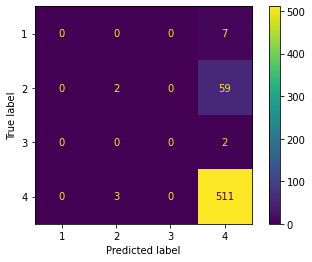

In [50]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classificador_estendido, X_test, y_test, values_format = '')